In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import re
import os
import time

In [2]:
df=pd.read_csv(r"C:\Users\sheej.DESKTOP-SDF1007\OneDrive\Documents\data\archive\FIFA19_Data.csv")
df.head()  

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
df.shape    

(18207, 89)

In [4]:
df.columns = [c.replace(' ', '') for c in df.columns]

In [5]:
df.drop("Unnamed:0",axis=1,inplace=True)
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,ClubLogo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
counts_preferred_foot = df["PreferredFoot"].value_counts()
counts_preferred_foot = counts_preferred_foot.reset_index()
counts_preferred_foot.columns = ["PreferredFoot","Count"]
print(counts_preferred_foot)

  PreferredFoot  Count
0         Right  13948
1          Left   4211


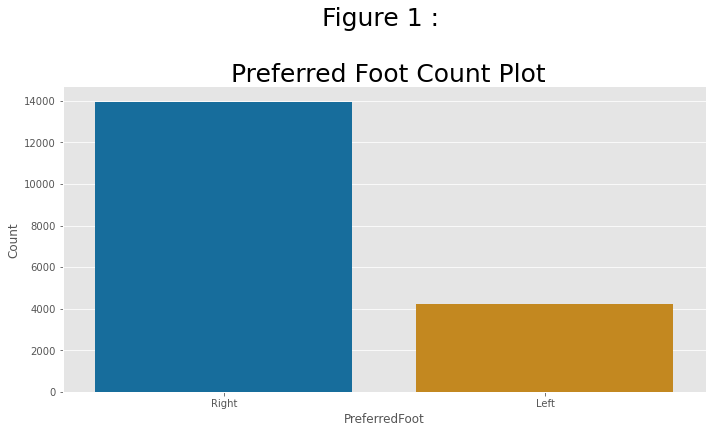

In [17]:
pt = sns.catplot(y="Count",
            x="PreferredFoot", data=counts_preferred_foot,
           palette="colorblind",height=5, aspect=2, kind="bar");
plt.style.use("ggplot")
plt.title("Figure 1 : \n\n Preferred Foot Count Plot",
          fontsize=25);
plt.savefig('Preferred Foot Count.png', dpi=250)

In [10]:
counts_Nationality = df["Nationality"].value_counts()
counts_Nationality = counts_Nationality.reset_index()
counts_Nationality.columns= ["Nations","Counts"]
counts_Nationality.head()

,Nations,Counts
0,England,1662
1,Germany,1198
2,Spain,1072
3,Argentina,937
4,France,914


In [11]:
counts_Nationality_top20 = counts_Nationality.iloc[0:20,:]
print(counts_Nationality_top20)

                Nations  Counts
0               England    1662
1               Germany    1198
2                 Spain    1072
3             Argentina     937
4                France     914
5                Brazil     827
6                 Italy     702
7              Colombia     618
8                 Japan     478
9           Netherlands     453
10               Sweden     397
11             China PR     392
12                Chile     391
13  Republic of Ireland     368
14               Mexico     366
15        United States     353
16               Poland     350
17               Norway     341
18         Saudi Arabia     340
19              Denmark     336


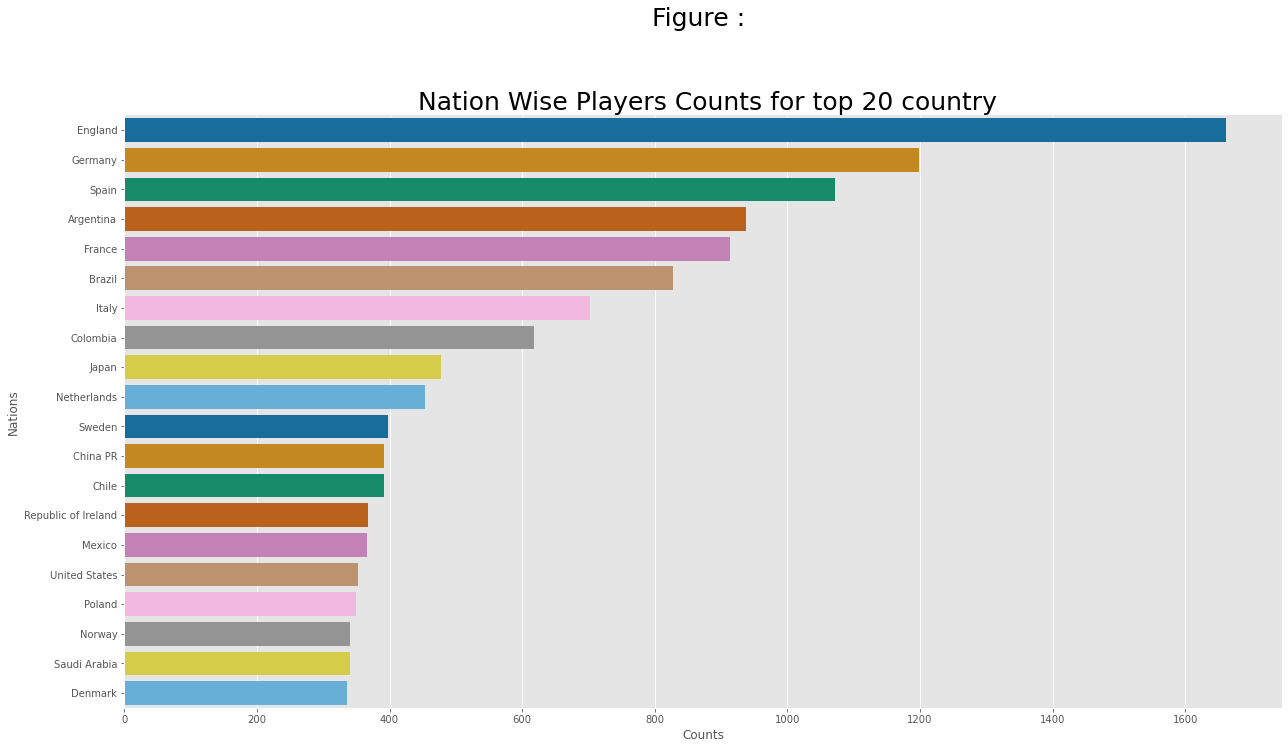

In [18]:
sns.catplot(y="Nations",
            x="Counts",data=counts_Nationality_top20,
            palette="colorblind",height=9,kind="bar",aspect=2)
plt.title("Figure : \n\n\n Nation Wise Players Counts for top 20 country",
          fontsize=25);
plt.savefig('Nation Wise Players Counts for top 20 country.png', dpi=250)

In [13]:
df.Age.value_counts()

21    1423
26    1387
24    1358
22    1340
23    1332
25    1319
20    1240
27    1162
28    1101
19    1024
29     959
30     917
18     732
31     707
32     574
33     408
34     404
17     289
35     196
36     127
37      82
16      42
38      37
39      25
40      13
41       5
44       2
42       1
45       1
Name: Age, dtype: int64

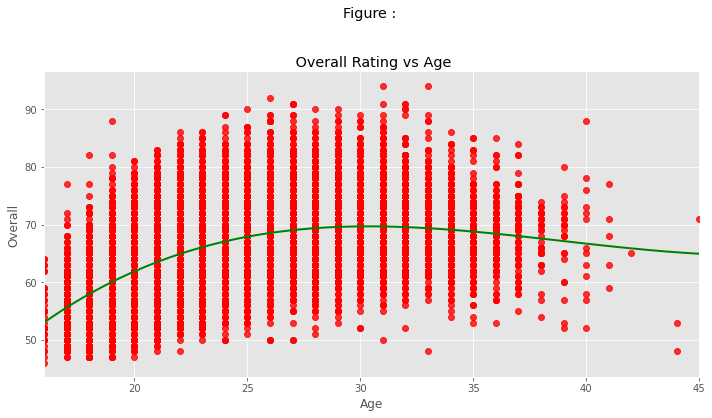

In [19]:
sns.lmplot(x="Age", y="Overall",data=df,markers="o",
           order=3, ci=None, scatter_kws={"color": "red"},
         line_kws={"linewidth":2,"color":"green"},aspect=2);

plt.title("Figure : \n\n\n Overall Rating vs Age");
plt.savefig('Overall Rating vs Age', dpi=250)